In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [14]:
mu =0
sigma = 0.01
talent = np.random.normal(mu,sigma, 1000)
looks =  np.random.normal(mu,sigma, 1000)

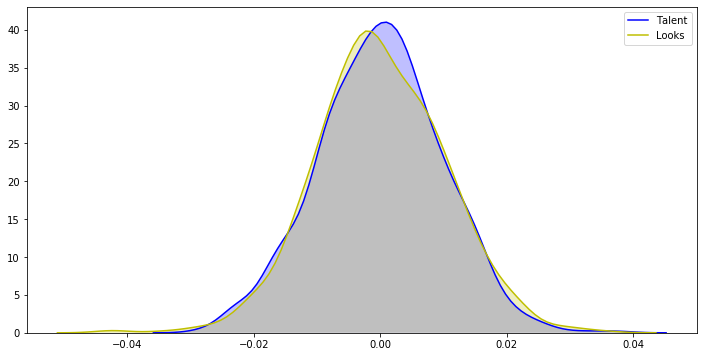

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(talent, color='b', shade=True, Label='Talent') 
sns.kdeplot(looks, color='y', shade=True, Label='Looks')
ax.legend()

In [16]:
corr = np.corrcoef(talent, looks)
print("Initial Correlation: {}".format(corr[0,1]))

Initial Correlation: -0.005730913895055992


## Conditioning on a collider

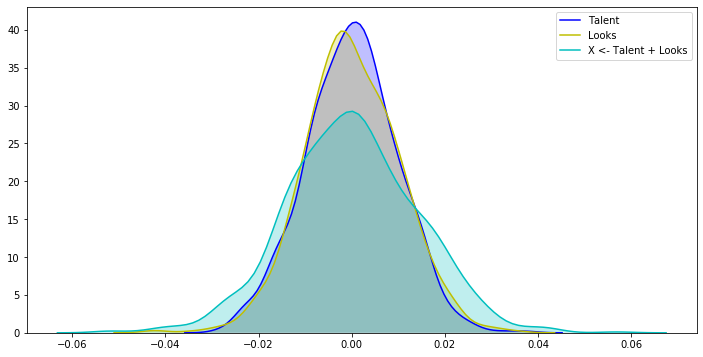

In [18]:
x = talent+looks

fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(talent, color='b', shade=True, Label='Talent') 
sns.kdeplot(looks, color='y', shade=True, Label='Looks')
sns.kdeplot(x, color='c', shade=True, Label='X <- Talent + Looks')

ax.legend()

In [19]:
jobs = np.array([1 if i> np.quantile(x, 0.75) else 0 for i in x])
jobs

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [188]:
df = pd.DataFrame({'talent': talent,
                  'looks': looks,
                  'jobs' : jobs})
df.head(10)

,talent,looks,jobs
0,-0.001944,0.017418,1
1,0.000304,0.002984,0
2,-0.011875,-0.013513,0
3,-0.002774,-0.016560,0
4,0.006691,0.002046,0
5,0.008375,0.007124,1
6,0.013288,-0.010998,0
7,-0.012567,0.005216,0
8,-0.022924,0.019857,0
9,-0.015986,-0.014788,0


In [191]:
corr = np.corrcoef(df['talent'][df.jobs == 1], df['looks'][df.jobs == 1])
print("Collider Correlation: {}".format(corr[0,1]))

Collider Correlation: -0.6222199215021822
